In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from tqdm import tqdm

sys.path.append("..")
from modules.utils import paper_style
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from dtaidistance import dtw, dtw_visualisation
from dtaidistance.dtw import warping_amount



paper_style()

from helper_fn import *

sys.path.append("..")

# current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = ""
relative_path = "../data"
path = os.path.join(current_dir, relative_path)
data_path = os.path.join(path, "test/")
data_drug_path = os.path.join(path, "test_drug/")
gt_path = os.path.join(path, "GT/")
gt_drug_path = os.path.join(path, "GT_drug/labels/")

drug = False

if drug:
    data_path_ = data_drug_path
    gt_path_ = gt_drug_path
else:
    data_path_ = data_path
    gt_path_ = gt_path

gt_tracks = []
taus = []
len_tracks = []

for i, fn in enumerate(os.listdir(gt_path_)):
    track = np.load(os.path.join(gt_path_, fn)).squeeze().T.astype(np.double)
    tau = np.linspace(0, 1, track.shape[0])
    gt_tracks.append(track)
    taus.append(tau)
    len_tracks.append(track.shape[0])

n_tracks = len(gt_tracks)
crossing_points_gt, idx_gt = find_crossing_points(taus, gt_tracks)

track_lengths = [track.shape[0] for track in gt_tracks]

modalities = ["bf", "h2b"]

# loading data

In [4]:
mod = "h2b"
head = "xtransformer"

tracks = get_data(data_path_, mod, head)

In [5]:
# get distance between tracks[0] and gt_tracks[0]

tr0 = tracks[0].astype(np.double)
gt0 = gt_tracks[0].astype(np.double)


# warping amount 


In [6]:
# help(dtw_visualisation)

warping amount 208 tr_len 267


(<Figure size 700x500 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

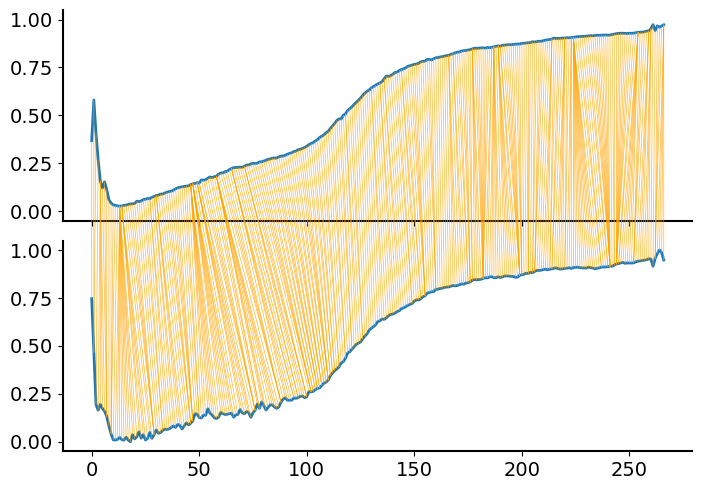

In [7]:
path_g = dtw.warping_path_fast(
        tr0[:, 0], gt0[:, 0], penalty=0
    )

tr_len = tr0.shape[0]
wa_g = dtw.warping_amount(path_g)
print(f"warping amount {wa_g} tr_len {tr_len}")

# visualize warping
dtw_visualisation.plot_warping(tr0[:, 0], gt0[:, 0], path_g)

In [8]:
len_tracks;

In [9]:
dtwa_un = dtw_dist_loop(gt_tracks, tracks, penalty=0, len_normalize=False)
dtwa_un_g, dtwa_un_r = dtwa_un[:, 0], dtwa_un[:, 1]

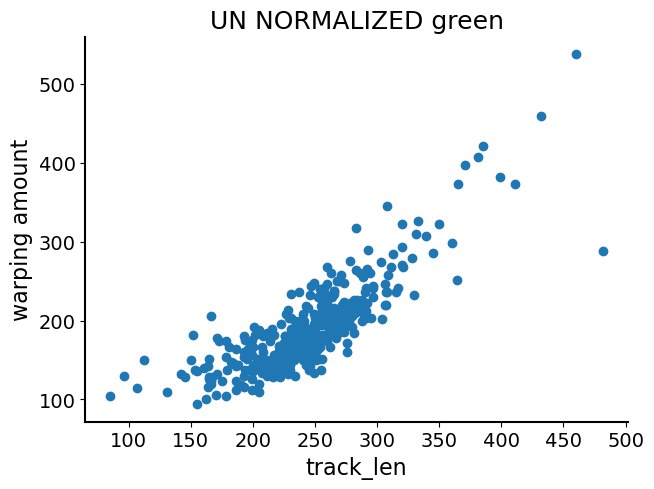

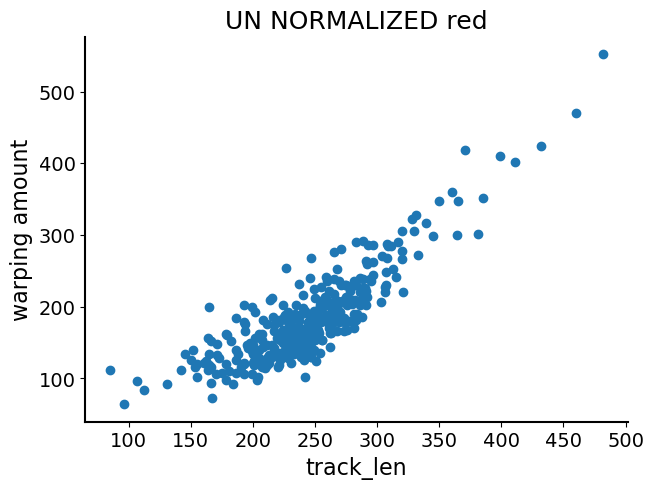

In [10]:
plt.scatter(len_tracks, dtwa_un_g)
plt.title("UN NORMALIZED green")
plt.xlabel("track_len")
plt.ylabel("warping amount")
plt.show()

# same for red
plt.scatter(len_tracks, dtwa_un_r)
plt.title("UN NORMALIZED red")
plt.xlabel("track_len")
plt.ylabel("warping amount")
plt.show()

# normalized dtwa

In [12]:
dtwa = dtw_dist_loop(gt_tracks, tracks, penalty=0, len_normalize=True)
dtwa_g, dtwa_r = dtwa[:, 0], dtwa[:, 1]

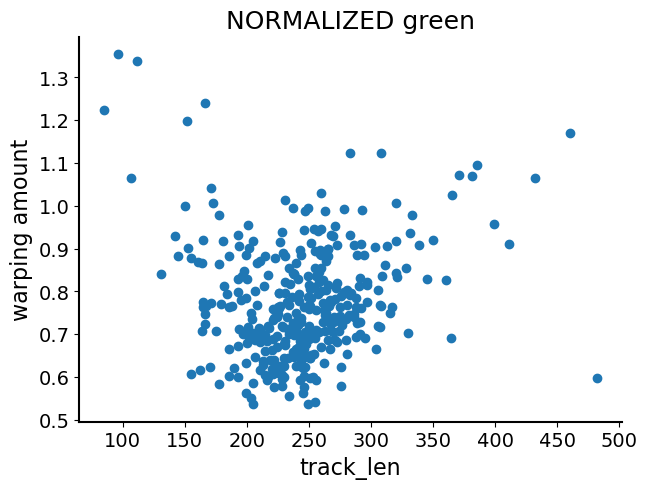

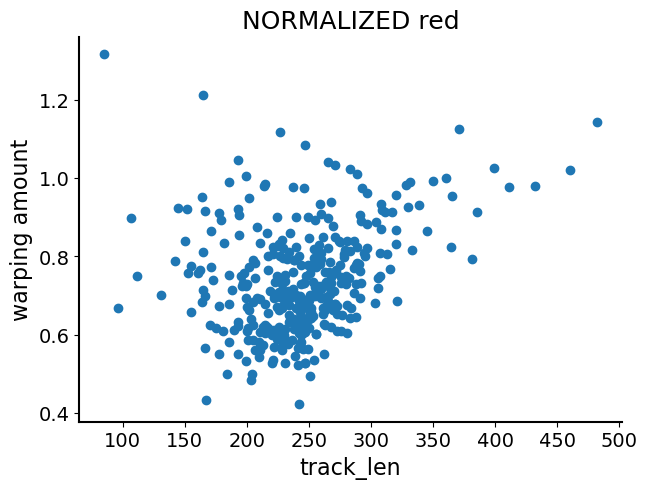

In [13]:
plt.scatter(len_tracks, dtwa_g)
plt.title("NORMALIZED green")
plt.xlabel("track_len")
plt.ylabel("warping amount")
plt.show()

# same for red
plt.scatter(len_tracks, dtwa_r)
plt.title("NORMALIZED red")
plt.xlabel("track_len")
plt.ylabel("warping amount")
plt.show()

Text(0, 0.5, 'dtw amount red')

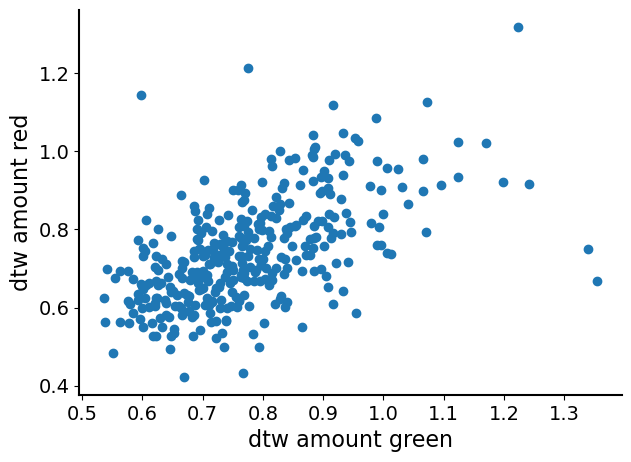

In [15]:
# plot green and red against each other
plt.scatter(dtwa_g, dtwa_r)

plt.xlabel("dtw amount green")
plt.ylabel("dtw amount red")

In [31]:
l1_metric_gr = mean_track_error(gt_tracks, tracks, av_channels=False)
l1_metric = l1_metric_gr.mean(axis=1)
dtwa_m = dtwa.mean(axis=1)

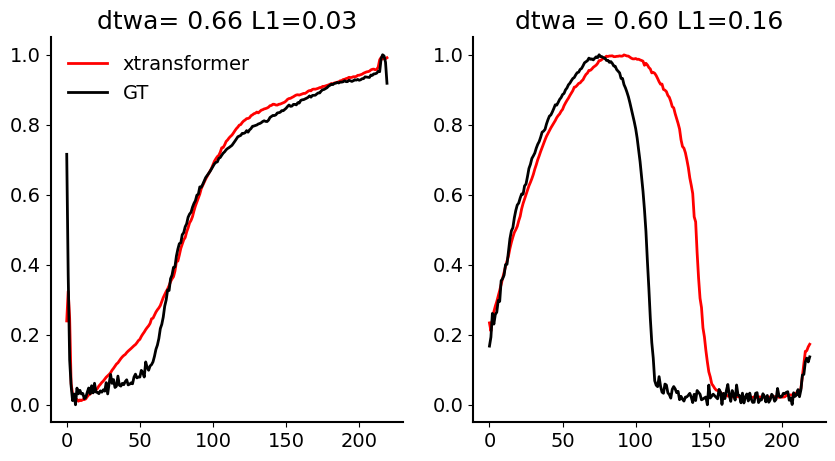

In [37]:
good_idx = 39
idx = np.random.randint(0, n_tracks)
idx = good_idx

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title(f"dtwa= {dtwa[idx, 0]:.2f} L1={l1_metric_gr[idx, 0]:.2f}")

plt.plot(tracks[idx][:, 0], color="red", label=head)
plt.plot(gt_tracks[idx][:, 0], color="black", label="GT")

plt.legend()

plt.subplot(1, 2, 2)
plt.title(f"dtwa = {dtwa[idx, 1]:.2f} L1={l1_metric_gr[idx, 1]:.2f}")

plt.plot(tracks[idx][:, 1], color="red", label=head)
plt.plot(gt_tracks[idx][:, 1], color="black", label="GT")

Text(0, 0.5, 'DTWa metric')

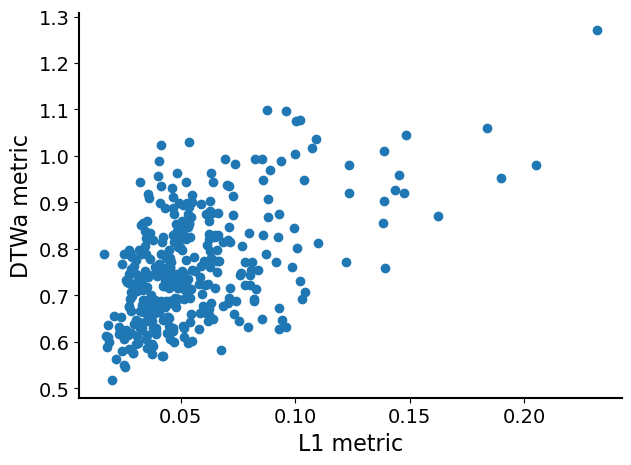

In [32]:
l1_metric.shape, dtwa_m.shape

plt.scatter(l1_metric, dtwa_m)
plt.xlabel("L1 metric")
plt.ylabel("DTWa metric")